In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
def atoi(a):
    return int(ord(a)-ord('a'))
def itoa(i):
    return chr(i+ord('a'))

def iors(s):
    try:
        return int(s)
    except ValueError: # if it is a string, return a string
        return s

In [15]:
def read_OCR(filename, n_examples, n_features):
    F = open(filename)
    dataset = {}
    dataset['ids'] = np.zeros(n_examples, dtype=int)
    dataset['labels'] = np.zeros(n_examples,dtype=int)
    dataset['next_ids'] = np.zeros(n_examples,dtype=int)
    dataset['word_ids'] = np.zeros(n_examples,dtype=int)
    dataset['positions'] = np.zeros(n_examples,dtype=int)
    dataset['folds'] = np.zeros(n_examples,dtype=int)
    dataset['features'] = np.zeros([n_examples,n_features])
    
    i = 0
    for str_line in F.readlines():
        line0 = list(map(iors, filter(None, re.split('\t', str_line.strip()))))
        
        dataset['ids'][i] = line0.pop(0)
        dataset['labels'][i] = atoi(line0.pop(0))
        dataset['next_ids'][i] = line0.pop(0)
        dataset['word_ids'][i] = line0.pop(0)
        dataset['positions'][i] = line0.pop(0)
        dataset['folds'][i] = line0.pop(0)
        if len(line0) != 128:  # Sanity check of the length
            print(len(line0))

        for j, v in enumerate(line0):
            dataset['features'][i][j] = v
        i += 1
        if i == n_examples:
            break
            
    return dataset

In [16]:
dataset1 = read_OCR('letter.data', 5000, 128)

The first 10 ids: [ 1  2  3  4  5  6  7  8  9 10]
The shape of features: (5000, 128)
ids[0]= 1
labels[0]= 14
The letter is  o
next_ids[0]= 2


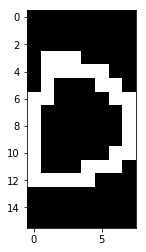

In [19]:
print("The first 10 ids:",dataset1['ids'][:10])
print("The shape of features:", dataset1['features'].shape)

print("ids[0]=",dataset1['ids'][0])
print("labels[0]=", dataset1['labels'][0])
print("The letter is ", itoa(dataset1['labels'][0]))
print("next_ids[0]=",dataset1['next_ids'][0])
# print "The feature of the first example:",dataset1['features'][0]
# Show the matrix into an image
imshow(dataset1['features'][0].reshape(16,8), cmap='gray')


omanding_mmanding_mmanding_mmanding_mmanding_mmand


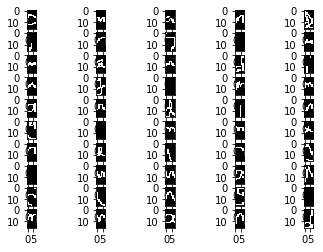

In [22]:
string1 = itoa(dataset1['labels'][0])

plt.figure()
plt.subplot(10,5,1)
imshow(dataset1['features'][0].reshape(16,8), cmap='gray')
id1 = dataset1['ids'][0]
next_id1 = dataset1['next_ids'][0]

for i in range(1,50):
    id1 = dataset1['ids'][next_id1-1]
    next_id1 = dataset1['next_ids'][next_id1-1]

    #print "id1", id1, "next_id1",  next_id1
    if next_id1 == -1: # Skip the next_id pointing to nothing
        feature1 = np.zeros((16,8),dtype=int)
        label1 = '_'
        string1 += label1
        plt.subplot(10,5,i+1)
        imshow(feature1, cmap='gray')
        next_id1 = id1+1
        continue
    
    string1 += itoa(dataset1['labels'][next_id1-1])

    plt.subplot(10,5,i+1)
    imshow(dataset1['features'][next_id1-1].reshape(16,8), cmap='gray')

print(string1)